In [1]:
from emlib import emlib

DEBUG -211- Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
def NPZNB_int(t,initial,dtinput,constants):

    B = initial[1]             # benthos
    P = initial[1]             # phytoplankton
    Z = initial[1]             # zooplankton
    DIN = initial[1]           # dissolved inorganic
    DON = initial[1]           # dissolved organic
    ddin = dtinput.Val("ddin") #Concentration by day from WRTDS model 2 columns date and ddin Units are mg/L N
    ddon = dtinput.Val("ddon") #Concentration by day from WRTDS model 2 columns date and ddon mg/l N
    
    i = constants.Val("i")      #irradiance
    Pg = constants.Val("Pg")    # max P growth
    Bg = constants.Val("Bg")    # max B growth
    e = constants.Val("e")      # Z ingestion
    Zm = constants.Val("Zm")    # Z mortality
    Pm = constants.Val("Pm")    # P mortality
    Bm = constants.Val("Bm")    # B mortality
    Pe = constants.Val("Pe")    # P excretion
    Be = constants.Val("Be")    # B excretion
    Pr = constants.Val("Pr")    # P recycle
    h = constants.Val("h")      # Z grazing
    s = constants.Val("s")      # sedimentation
    
    P_dot = (i * Pg * P * DIN) + (Pr * DON * P) - (h * P * Z) - (Pm * P * P) - (Pe * P)
    Z_dot = ((2 * e - 1)*h * P * Z) - (Zm * Z * Z)-(0.8* (1 - e) * h * P * Z)-(0.2 * (1 - e) * h * P * Z)
    B_dot = (Bg * B)/ (1 + Bg * B) * (DON + DIN) - (Bm * B * B) - (Be * B)
    #DIN_dot = ddin + (0.8* (1 - e) * h * P * Z) + (Be * B) - (i * Pg * P) - ((Bg * B)/ (1 + Bg * B) * (DIN))
    #DON_dot = ddon + (Bm * B * B) + (Pm * P * P) + (Zm * Z * Z) + (Pe * P) + (0.2 * (1 - e) * h * P * Z) \
    #         - (Pr * DON * P) - ((Bg * B)/ (1 + Bg * B) * (DON)) - (s * DON)

    
    DIN_dot = ddin + (0.8* (1 - e) * h * P * Z) + (Be * B)+  (Pe * P) \
                - (i * Pg * P * DIN) - ((Bg * B)/ (1 + Bg * B) * (DIN))
    DON_dot = ddon + (Bm * B * B)  +(Pm * P * P)  + (Zm * Z * Z)  + (0.2 * (1 - e) * h * P * Z) \
             - (Pr * DON * P)  - ((Bg * B)/ (1 + Bg * B) * (DON)) 
    return [P_dot, Z_dot, B_dot, DIN_dot, DON_dot]

In [3]:
NPZNB = emlib.Model(NPZNB_int) #save the model

INFO -1105- New Model(1): NPZNB_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1131- Integrator:vode/bdf order:12 nsteps:3000 dt:1


In [4]:
nutrients= emlib.TimeSeries(dirname="Data",filename="Nueces_input.csv") #loading in input timeseries data ddin and ddon in same file

INFO -880- New TimeSeries instance: 1
DEBUG -952- New INPUT table DataNueces_input.csv['ï»¿Date', 'ddin', 'ddon']
DEBUG -963- Saved 10810 rows and 2 columns
DEBUG -965- Converted dates to contiguous np.array
DEBUG -967- Converted input data to contiguous np.array


In [5]:
BTest = emlib.Observation ("B", dirname="Data",filename= "NB_MG_Calibrate.csv")

DEBUG -740- ['DATE', 'B']
DEBUG -742- New OBS for value:B COLMS:1 DataNB_MG_Calibrate.csv
INFO -759- Read file DataNB_MG_Calibrate.csv 64 Observations for value B


In [6]:
NPZNBcalibration = emlib.Calibration()
NPZNBcalibration.Add("i",val=1.0, min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("Pg",val=0.5,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("Bg",val=0.1,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("e",val=0.2,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("Zm",val=0.2,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("Pm",val=0.1,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("Bm",val=0.1,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.Add("Pe",val=0.1,min= 0.01, max= 3)#random number
NPZNBcalibration.Add("Be",val=0.1,min= 0.01, max= 3)#random number
NPZNBcalibration.Add("Pr",val=0.3,min= 0.01, max= 3)#random number
NPZNBcalibration.Add("h",val=0.3,min=0.1,max=100)#random moving number
NPZNBcalibration.Add("s",val=0.15,min= 0.01, max= 3)#from Turner 2014
NPZNBcalibration.initial=[1,1,1,1,1]

INFO -353- New Calibration instance: 1
DEBUG -596- C:1 i 1.0 False
DEBUG -596- C:2 Pg 0.5 False
DEBUG -596- C:3 Bg 0.1 False
DEBUG -596- C:4 e 0.2 False
DEBUG -596- C:5 Zm 0.2 False
DEBUG -596- C:6 Pm 0.1 False
DEBUG -596- C:7 Bm 0.1 False
DEBUG -596- C:8 Pe 0.1 False
DEBUG -596- C:9 Be 0.1 False
DEBUG -596- C:10 Pr 0.3 False
DEBUG -596- C:11 h 0.3 False
DEBUG -596- C:12 s 0.15 False


DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810

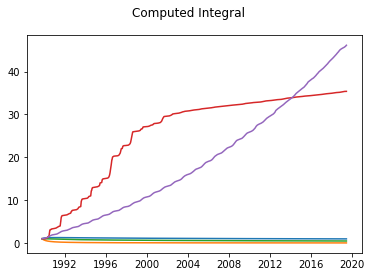

In [7]:
NPZNB.Integrate(NPZNBcalibration.initial, Calibration=NPZNBcalibration,TimeSeries= nutrients, dt=0.01) 
NPZNB.Draw()

In [8]:
best = NPZNB.Calibrate (NPZNBcalibration, BTest, runs =200, TimeSeries= nutrients)

WARNING -1352- No fitness method provided, assuming GF_BruteForceMSE
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6

DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:5
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's'

DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness

DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:105

DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 

DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810

DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:29
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310

DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:34
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310

DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:39
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310

DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:44
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing D

DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV

DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:900

DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1

DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:63
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205-

DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:68
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310

DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:73
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810

DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:78
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing D

DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV

DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:900

DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1

DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:97
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205-

DEBUG -1453- New fitness object:101
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG

DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:106
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:681

DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:111
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:881

DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:116
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:1081

DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:121
DEBUG -1138- ODEINT Initials:11111
DEBUG -117

DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integrat

DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:900

DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1

DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:140
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205

DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:145
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:731

DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:150
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:931

DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:155
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', '

DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness

DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:105

DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 

DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810

DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:179
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:681

DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:184
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:881

DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:189
DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:1081

DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integration, created np.array shape:(10810, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:194
DEBUG -1138- ODEINT Initials:11111
DEBUG -117

DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810 Remaining:4310
DEBUG -1205- Integration dT:7000 of 10810 Remaining:3810
DEBUG -1205- Integration dT:7500 of 10810 Remaining:3310
DEBUG -1205- Integration dT:8000 of 10810 Remaining:2810
DEBUG -1205- Integration dT:8500 of 10810 Remaining:2310
DEBUG -1205- Integration dT:9000 of 10810 Remaining:1810
DEBUG -1205- Integration dT:9500 of 10810 Remaining:1310
DEBUG -1205- Integration dT:10000 of 10810 Remaining:810
DEBUG -1205- Integration dT:10500 of 10810 Remaining:310
DEBUG -1217- Completed Integrat

In [10]:
best.Print()

Label	Value	Min	Max	ISConst	Desc
i 	 1.0 	 0.01 	 3 	 False 	 None
Pg 	 0.5 	 0.01 	 3 	 False 	 None
Bg 	 0.1 	 0.01 	 3 	 False 	 None
e 	 0.2 	 0.01 	 3 	 False 	 None
Zm 	 0.2 	 0.01 	 3 	 False 	 None
Pm 	 0.1 	 0.01 	 3 	 False 	 None
Bm 	 0.1 	 0.01 	 3 	 False 	 None
Pe 	 0.1 	 0.01 	 3 	 False 	 None
Be 	 0.1 	 0.01 	 3 	 False 	 None
Pr 	 0.3 	 0.01 	 3 	 False 	 None
h 	 0.3 	 0.1 	 100 	 False 	 None
s 	 0.15 	 0.01 	 3 	 False 	 None


DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:1989-10-01 Ending:10810
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 10810 Remaining:10810
DEBUG -1205- Integration dT:500 of 10810 Remaining:10310
DEBUG -1205- Integration dT:1000 of 10810 Remaining:9810
DEBUG -1205- Integration dT:1500 of 10810 Remaining:9310
DEBUG -1205- Integration dT:2000 of 10810 Remaining:8810
DEBUG -1205- Integration dT:2500 of 10810 Remaining:8310
DEBUG -1205- Integration dT:3000 of 10810 Remaining:7810
DEBUG -1205- Integration dT:3500 of 10810 Remaining:7310
DEBUG -1205- Integration dT:4000 of 10810 Remaining:6810
DEBUG -1205- Integration dT:4500 of 10810 Remaining:6310
DEBUG -1205- Integration dT:5000 of 10810 Remaining:5810
DEBUG -1205- Integration dT:5500 of 10810 Remaining:5310
DEBUG -1205- Integration dT:6000 of 10810 Remaining:4810
DEBUG -1205- Integration dT:6500 of 10810

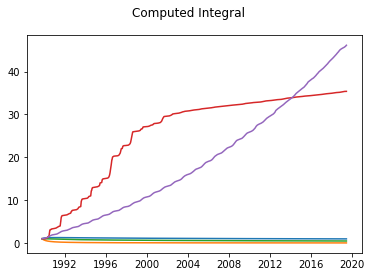

In [12]:
NPZNB.Integrate(NPZNBcalibration.initial, Calibration=best,TimeSeries= nutrients, dt=0.01) 
NPZNB.Draw()

DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -269- GFMODEL #0 Xtot0.114 RMSD%:100.0 RMSE:0 RANGE%0 WMSE:0.0
DEBUG -1453- New fitness object:201
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos


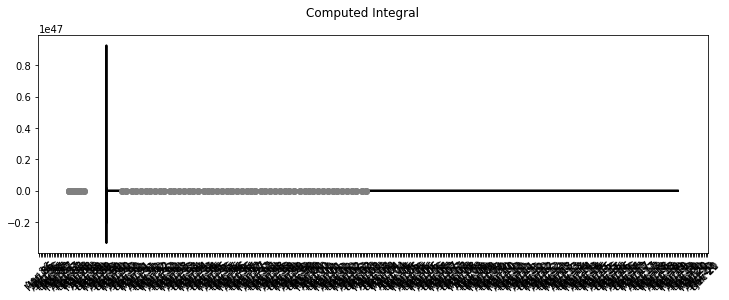

GFMODEL #0 Xtot:0.114 RMSD:100.0 RMSE:0 RANGE%0 MSER:0.0 WMSE:0.0


In [11]:
NPZNB.Validate(BTest, graph =True) 
NPZNB.fit.Print()